In [1]:
import pandas as pd

In [2]:
ins = pd.read_csv('./insurance.csv')

In [4]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#sex has a categorical value
ins['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


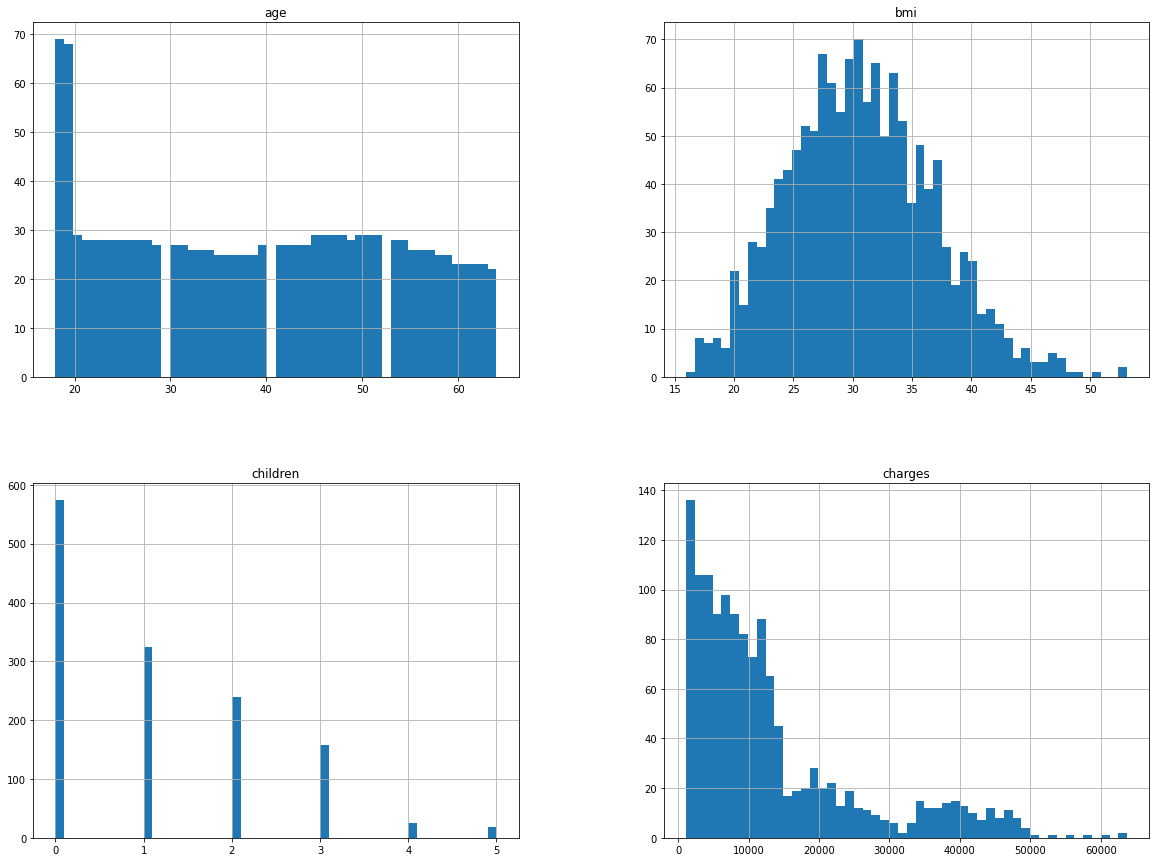

In [12]:
#visualizing dataset
%matplotlib inline
import matplotlib.pyplot as plt

ins.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
#splitting train test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ins, test_size=0.2, random_state=22)

In [15]:
train_set

,age,sex,bmi,children,smoker,region,charges
425,45,male,24.310,5,no,southeast,9788.86590
851,61,male,32.300,2,no,northwest,14119.62000
22,18,male,34.100,0,no,southeast,1137.01100
386,58,female,39.050,0,no,southeast,11856.41150
560,46,female,19.950,2,no,northwest,9193.83850
...,...,...,...,...,...,...,...
356,46,male,43.890,3,no,southeast,8944.11510
960,19,female,39.615,1,no,northwest,2730.10785
812,54,male,21.010,2,no,southeast,11013.71190
132,53,female,35.900,2,no,southwest,11163.56800


In [16]:
test_set

,age,sex,bmi,children,smoker,region,charges
1231,20,female,21.800,0,yes,southwest,20167.33603
768,64,female,39.700,0,no,southwest,14319.03100
847,23,male,50.380,1,no,southeast,2438.05520
510,56,male,32.110,1,no,northeast,11763.00090
363,21,female,26.400,1,no,southwest,2597.77900
...,...,...,...,...,...,...,...
882,21,female,22.135,0,no,northeast,2585.85065
1039,19,male,27.265,2,no,northwest,22493.65964
874,44,male,21.850,3,no,northeast,8891.13950
757,47,female,27.830,0,yes,southeast,23065.42070


In [17]:
#creating a copy of train set
insurance = train_set.copy()

<AxesSubplot:xlabel='age', ylabel='bmi'>

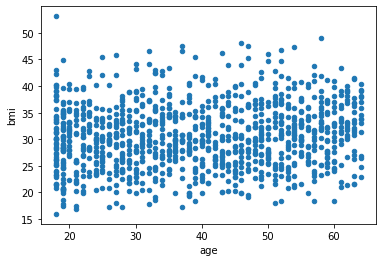

In [18]:
insurance.plot(kind='scatter', x='age', y='bmi')

<AxesSubplot:xlabel='age', ylabel='bmi'>

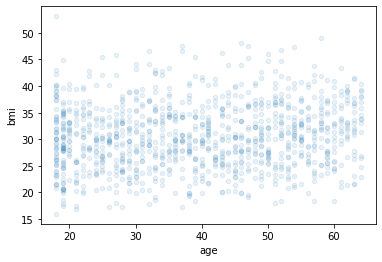

In [19]:
insurance.plot(kind='scatter', x='age', y='bmi', alpha=0.1)

In [20]:
corr_matrix = insurance.corr()

In [22]:
corr_matrix

,age,bmi,children,charges
age,1.000000,0.120633,0.032882,0.307095
bmi,0.120633,1.000000,0.014318,0.201996
children,0.032882,0.014318,1.000000,0.064840
charges,0.307095,0.201996,0.064840,1.000000


In [23]:
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.307095
bmi         0.201996
children    0.064840
Name: charges, dtype: float64

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

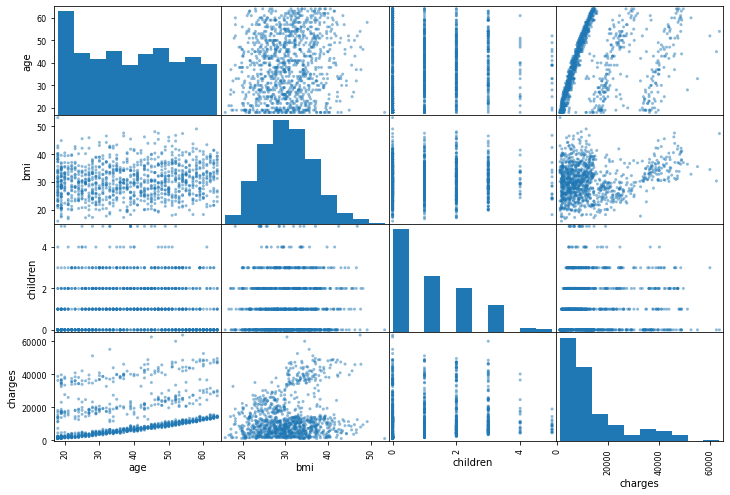

In [24]:
#checking for correlation using pandas scatter plot
from pandas.plotting import scatter_matrix

scatter_matrix(insurance, figsize=(12,8))

<AxesSubplot:xlabel='age', ylabel='charges'>

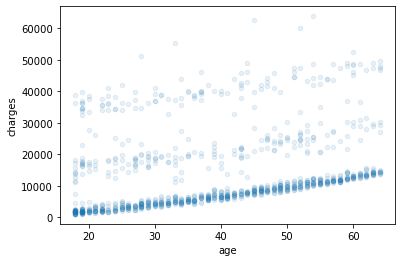

In [25]:
#the most correlated feature with charges is age, visualizing further into it
insurance.plot(kind='scatter', x='age', y='charges', alpha=0.1)

In [55]:
#preparing data for ML algorithm
insurance = train_set.drop('charges', axis=1)
insurance_labels = train_set['charges'].copy()

In [30]:
#using sklearn method to fill empty cell
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [33]:
#dropping the text column
insurance_num = insurance.drop(['sex', 'region', 'smoker'], axis=1)

In [34]:
#fitting imputer into training dataset
imputer.fit(insurance_num)

SimpleImputer(strategy='median')

In [35]:
#getting the result of imputer
imputer.statistics_

array([39.    , 30.3025,  1.    ])

In [37]:
insurance_num.median().values

array([39.    , 30.3025,  1.    ])

In [38]:
#using trained imputer to transform the training set by replacing missing value with learned medians
X = imputer.transform(insurance_num)

In [40]:
insurance_tr = pd.DataFrame(X, columns=insurance_num.columns)
insurance_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   float64
 1   bmi       1070 non-null   float64
 2   children  1070 non-null   float64
dtypes: float64(3)
memory usage: 25.2 KB


In [42]:
#handling categorical attributes
insurance_cat = insurance[['sex', 'region', 'smoker']]
insurance_cat.head(10)

,sex,region,smoker
425,male,southeast,no
851,male,northwest,no
22,male,southeast,no
386,female,southeast,no
560,female,northwest,no
649,female,northeast,no
162,male,southwest,no
248,male,southwest,no
1013,male,northwest,no
258,male,northwest,no


In [43]:
#using onehotencoder to convert from categorical to numeric
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
insurance_cat_1hot = cat_encoder.fit_transform(insurance_cat)
insurance_cat_1hot

<1070x8 sparse matrix of type '<class 'numpy.float64'>'
	with 3210 stored elements in Compressed Sparse Row format>

In [44]:
insurance_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [48]:
#Featuring SCaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
insurance_num_tr = num_pipeline.fit_transform(insurance_num)

In [75]:
from sklearn.compose import ColumnTransformer
num_attribs = list(insurance_num)
cat_attribs = ['sex', 'region', 'smoker']
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
insurance_prepared = full_pipeline.fit_transform(insurance)

In [76]:
insurance_prepared.shape

(1070, 11)

In [53]:
#Select and Train a Model
#Training and Evaluating on the Training Set

In [77]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(insurance_prepared, insurance_labels)

LinearRegression()

In [105]:
#picking some data to validate
some_data = insurance.iloc[:11]
some_labels = insurance_labels[:11]
some_data_prepared = full_pipeline.fit_transform(some_data)

In [106]:
some_data_prepared.shape


(11, 11)

In [107]:
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 7582.48638057 13553.87872388  2636.89627406 13825.36940711
  6285.31556374 12827.92730339 13461.47852868  -774.69474898
 10154.41853108  9385.47057418 24924.34512785]
Labels: [9788.8659, 14119.62, 1137.011, 11856.4115, 9193.8385, 12430.95335, 10450.552, 1832.094, 8765.249, 11520.09985, 17085.2676]


In [108]:
'''It works, although the predictions are not exactly accurate (e.g., the first prediction is
off by close to 22%!). Let’s measure this regression model’s RMSE on the whole train‐
ing set using Scikit-Learn’s mean_squared_error function:'''

'It works, although the predictions are not exactly accurate (e.g., the first prediction is\noff by close to 40%!). Let’s measure this regression model’s RMSE on the whole train‐\ning set using Scikit-Learn’s mean_squared_error function:'

In [111]:
from sklearn.metrics import mean_squared_error
import numpy as np
insurance_predictions = lin_reg.predict(insurance_prepared)
lin_mse = mean_squared_error(insurance_labels, insurance_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6062.731020519986

In [112]:
#using decisiontreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(insurance_prepared, insurance_labels)

DecisionTreeRegressor()

In [113]:
insurance_predictions = tree_reg.predict(insurance_prepared)
tree_mse = mean_squared_error(insurance_labels, insurance_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [114]:
#using cross-validation

In [116]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, insurance_prepared, insurance_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [117]:
def display_scores(scores):
 print("Scores:", scores)
 print("Mean:", scores.mean())
 print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [6632.76495677 7565.56779952 6615.68549459 6775.16020195 4544.94697429
 5930.37877947 6313.36155507 5920.89910635 7116.99601401 5781.30981998]
Mean: 6319.707070200188
Standard deviation: 795.688017547214


In [118]:
lin_scores = cross_val_score(lin_reg, insurance_prepared, insurance_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6769.66300312 6705.54246025 5852.02924686 6778.73017655 4967.10442347
 5272.78553563 6068.40563318 5527.07124888 6657.30571134 6307.04847486]
Mean: 6090.568591414459
Standard deviation: 631.4147039206463


In [119]:
#the decision tree is overfitting
#using random forest regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()
random_reg.fit(insurance_prepared, insurance_labels)

RandomForestRegressor()

In [124]:
insurance_predictions = random_reg.predict(insurance_prepared)
random_mse = mean_squared_error(insurance_labels, insurance_predictions)
random_rmse = np.sqrt(random_mse)
random_rmse

1761.1893634562791

In [127]:
random_scores = cross_val_score(random_reg, insurance_prepared, insurance_labels, scoring='neg_mean_squared_error', cv=10)
random_rmse_scores = np.sqrt(-random_scores)
display_scores(random_rmse_scores)

Scores: [5055.60810173 4789.00737169 4432.89301799 6085.44532839 3240.29376081
 4001.17274782 4935.54962729 4443.9608847  5372.92052105 4911.9692819 ]
Mean: 4726.882064337349
Standard deviation: 731.8368924100555


In [146]:
#using svm
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=50)
svr.fit(insurance_prepared, insurance_labels)

SVR(C=50, kernel='linear')

In [147]:
insurance_predictions = svr.predict(insurance_prepared)
svr_mse = mean_squared_error(insurance_labels, insurance_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

8241.95399826986

In [148]:
svr_scores = cross_val_score(svr, insurance_prepared, insurance_labels,
scoring="neg_mean_squared_error", cv=10)

svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Scores: [ 9138.36742577 10330.68306472  8024.58908195  9048.26967772
  7130.82331124  6721.65695159  7520.2223697   6787.1274366
  9636.47022015  7954.94689793]
Mean: 8229.315643737946
Standard deviation: 1186.2765823586112


In [149]:
#Fine-Tune  Model

In [156]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 20, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(insurance_prepared, insurance_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 20, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [157]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [158]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


6058.860373551816 {'max_features': 2, 'n_estimators': 3}
5140.116007474625 {'max_features': 2, 'n_estimators': 10}
5035.772738230448 {'max_features': 2, 'n_estimators': 20}
4977.599838527023 {'max_features': 2, 'n_estimators': 30}
5239.307194798761 {'max_features': 4, 'n_estimators': 3}
4795.572962191273 {'max_features': 4, 'n_estimators': 10}
4727.958147266754 {'max_features': 4, 'n_estimators': 20}
4651.997913921531 {'max_features': 4, 'n_estimators': 30}
5172.6651756822475 {'max_features': 6, 'n_estimators': 3}
4811.5401472560325 {'max_features': 6, 'n_estimators': 10}
4667.858173546929 {'max_features': 6, 'n_estimators': 20}
4691.282743276891 {'max_features': 6, 'n_estimators': 30}
5185.702999833384 {'max_features': 8, 'n_estimators': 3}
4856.763504653581 {'max_features': 8, 'n_estimators': 10}
4751.250601624746 {'max_features': 8, 'n_estimators': 20}
4716.907062113653 {'max_features': 8, 'n_estimators': 30}
5651.82909219838 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3

In [159]:
#Analyze the Best Models and Their Errors

In [160]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([0.14592917, 0.18623696, 0.02536715, 0.00431048, 0.00379526,
       0.00415148, 0.00520038, 0.00618815, 0.0045685 , 0.34302406,
       0.27122841])

In [161]:
extra_attribs = ['sex', 'region', 'smoker']
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.18623695695094572, 'bmi'),
 (0.14592917400194208, 'age'),
 (0.025367153355762492, 'children'),
 (0.006188147466221104, 'male'),
 (0.005200380022799063, 'female'),
 (0.004310479600760023, 'sex'),
 (0.0041514835605218, 'smoker'),
 (0.003795255013778744, 'region')]

In [162]:
#Evaluate Your System on the Test Set

In [163]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("charges", axis=1)
y_test = test_set["charges"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

In [164]:
final_rmse

5331.069662064115

In [165]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([4288.22865619, 6200.94367623])

In [171]:
final_model = RandomForestRegressor()
X_test = test_set.drop("charges", axis=1)
y_test = test_set["charges"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_model.fit(X_test_prepared, y_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

In [172]:
final_rmse

1943.364573046188

In [173]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([1592.11859443, 2240.1986762 ])